In [3]:
import numpy as np
import pandas as pd 
from sklearn.cluster import AgglomerativeClustering as AG
from scipy.cluster.hierarchy import dendrogram 
import seaborn as sns
import matplotlib.pyplot as plt
import scipy
import os
import sys
import cluster
import plots
import svd
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [ ]:
# mutant % open from SAXS
saxs = {
        'E':100, 
        'R':90,
        'Q':84,
        'N':77,
        'V':35,
        'G':32,
        'A':24,
        'S':24,
        }

In [26]:
# would be nice to have a mutant close to 50% activation
# maybe atchley factors can suggest
# find a residue in between N and V
from eidos.bio import atchley_factors as af
from eidos.utils import sort_dictionary_values as sort_dict

midpoint = np.mean([af['N'],af['V']], axis=0)
resi_similarities = {}
for res_id, factors in af.items():
    resi_similarities[res_id] = np.linalg.norm(factors - midpoint)
sort_dict(resi_similarities) 

{'N': 2.0395200415784105,
 'V': 2.0395200415784105,
 'F': 2.213123810363984,
 'A': 2.2232975509364463,
 'C': 2.3063265163458535,
 'T': 2.391574167781547,
 'I': 2.4123527934363165,
 'L': 2.6274405797277316,
 'E': 2.6900881026464543,
 'W': 2.7232998365953023,
 'G': 2.8398751733130805,
 'K': 2.96275344907402,
 'P': 2.9922890903119637,
 'H': 3.00255541164522,
 'M': 3.333884821045862,
 'Y': 3.5513517144884426,
 'R': 3.7097063226083002,
 'Q': 4.104715580889862,
 'D': 5.284526563468104,
 'S': 5.8172209000518444}

In [4]:
# open the combined ccs data for all the states
df = pd.read_csv('test_data.csv', index_col='Resi')

In [5]:
# view it
df

,R,Q,N,A,G,S,V
Resi,,,,,,,
2.0,4.24800,4.21325,4.23050,4.22100,4.21550,4.18525,4.21550
5.0,4.16475,4.15050,4.15000,4.15925,4.11000,4.15925,4.14350
6.1,6.35550,6.35675,6.35550,6.34725,6.33775,6.34725,6.35575
6.2,7.13475,7.13475,7.13475,7.12125,7.12125,7.12125,7.12125
11.0,4.29475,4.29975,4.30900,4.32100,4.32100,4.32850,4.32100
...,...,...,...,...,...,...,...
561.2,7.43425,7.42650,7.41775,7.41100,7.41100,7.32025,7.41100
564.0,6.77375,6.76675,6.75150,6.75525,6.75525,6.75525,6.75525
565.0,6.34150,6.33350,6.33625,6.33000,6.32975,6.33000,6.33475


In [7]:
# perform clustering on the correlation matrix
hac = cluster.HAC(df)

In [8]:
# look at the absolute values of the correlation matrix
hac.absolute_corr

Resi,2.0,5.0,6.1,6.2,11.0,17.1,17.2,19.1,24.0,25.1,...,547.1,547.2,548.1,548.2,561.1,561.2,564.0,565.0,569.0,574.0
Resi,,,,,,,,,,,,,,,,,,,,,
2.0,1.000000,0.137274,0.368572,0.597637,0.736154,0.570612,0.077311,0.563160,0.530732,0.100531,...,0.741131,0.745840,0.179468,0.621193,0.459797,0.847799,0.480482,0.780938,0.563317,0.024305
5.0,0.137274,1.000000,0.640432,0.353062,0.305640,0.345321,0.773849,0.375414,0.308501,0.702498,...,0.345383,0.340090,0.471566,0.361277,0.451926,0.136114,0.368825,0.417259,0.494701,0.190477
6.1,0.368572,0.640432,1.000000,0.674499,0.620304,0.676767,0.256114,0.665614,0.840462,0.254942,...,0.459392,0.441274,0.403747,0.675250,0.666372,0.343246,0.401282,0.713987,0.023588,0.461854
6.2,0.597637,0.353062,0.674499,1.000000,0.919941,0.998364,0.294448,0.948393,0.917702,0.341702,...,0.731378,0.715315,0.576937,0.994038,0.979031,0.529261,0.580026,0.738922,0.001238,0.680953
11.0,0.736154,0.305640,0.620304,0.919941,1.000000,0.921647,0.091645,0.970500,0.878725,0.109065,...,0.630102,0.618805,0.356236,0.891078,0.860937,0.704197,0.802945,0.796962,0.147079,0.485499
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
561.2,0.847799,0.136114,0.343246,0.529261,0.704197,0.528644,0.318976,0.543312,0.587993,0.288282,...,0.377998,0.375542,0.375909,0.516512,0.353488,1.000000,0.406971,0.536342,0.800493,0.128665
564.0,0.480482,0.368825,0.401282,0.580026,0.802945,0.588827,0.005861,0.790631,0.559764,0.039342,...,0.300120,0.295742,0.325469,0.517872,0.572622,0.406971,1.000000,0.637796,0.143979,0.346507
565.0,0.780938,0.417259,0.713987,0.738922,0.796962,0.713946,0.009752,0.733411,0.755109,0.031597,...,0.823401,0.819044,0.311282,0.758177,0.679576,0.536342,0.637796,1.000000,0.107725,0.459570


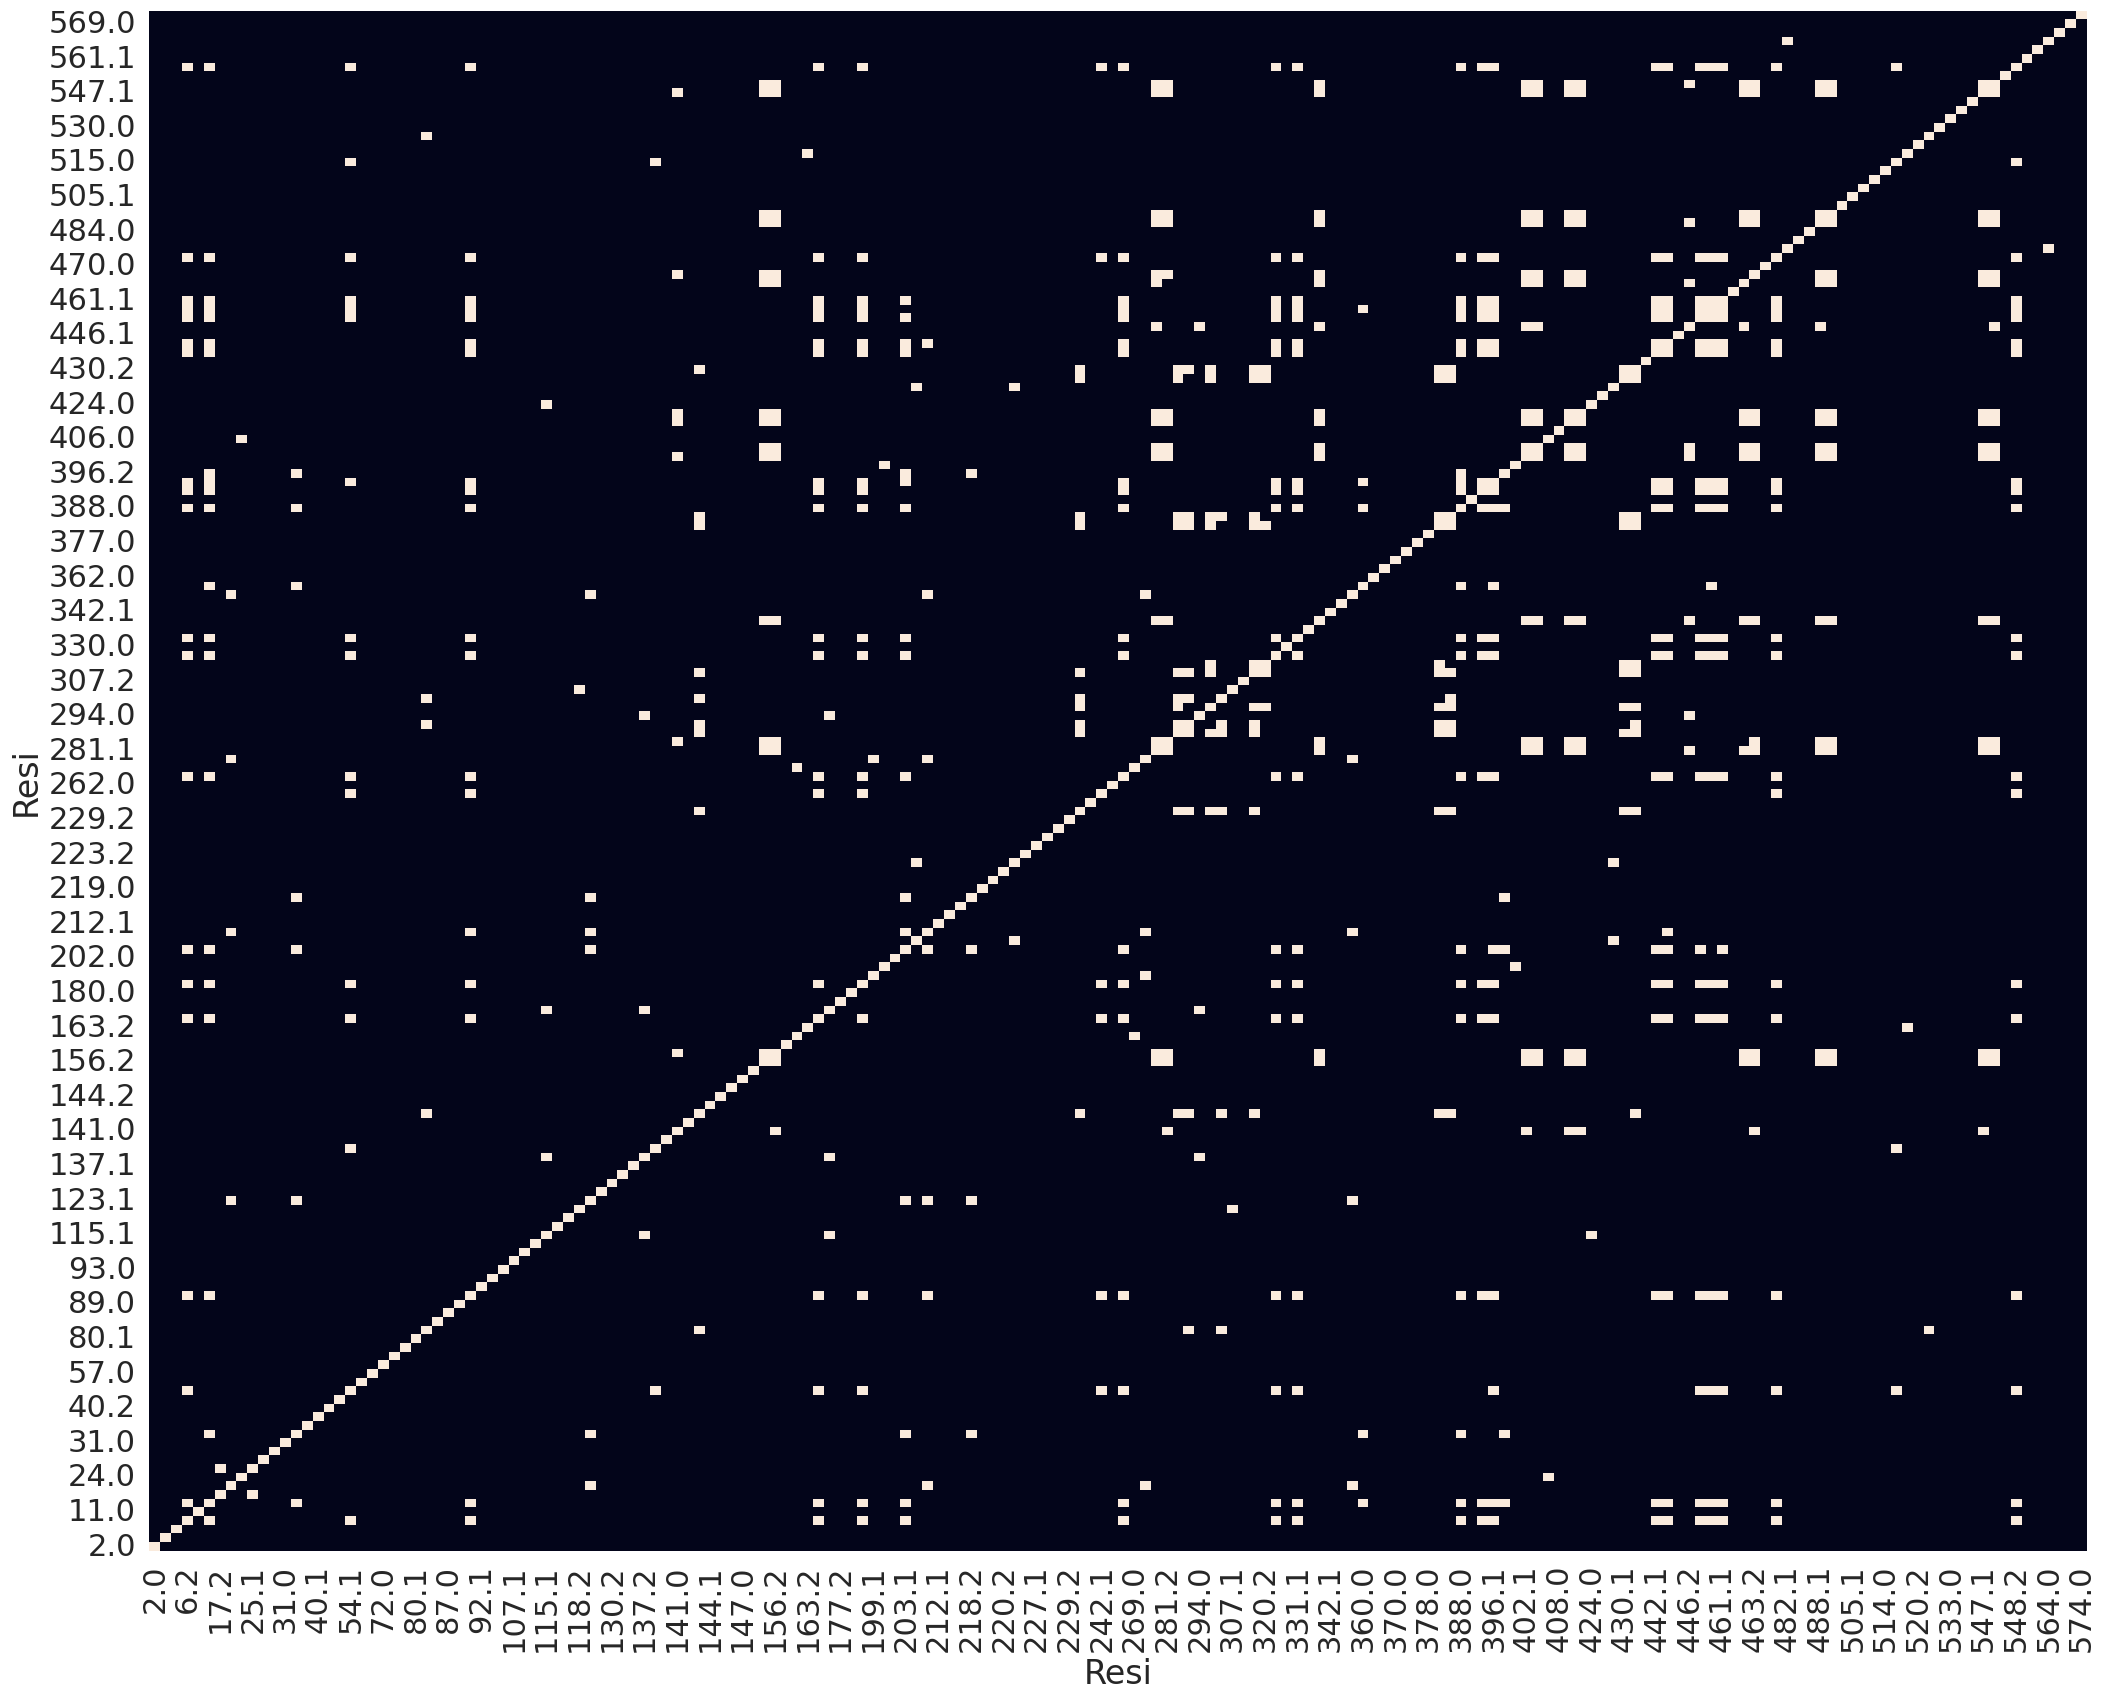

In [16]:
# plot the correlation matrix - the default cutoff is .98
plots.plot_corr(hag)

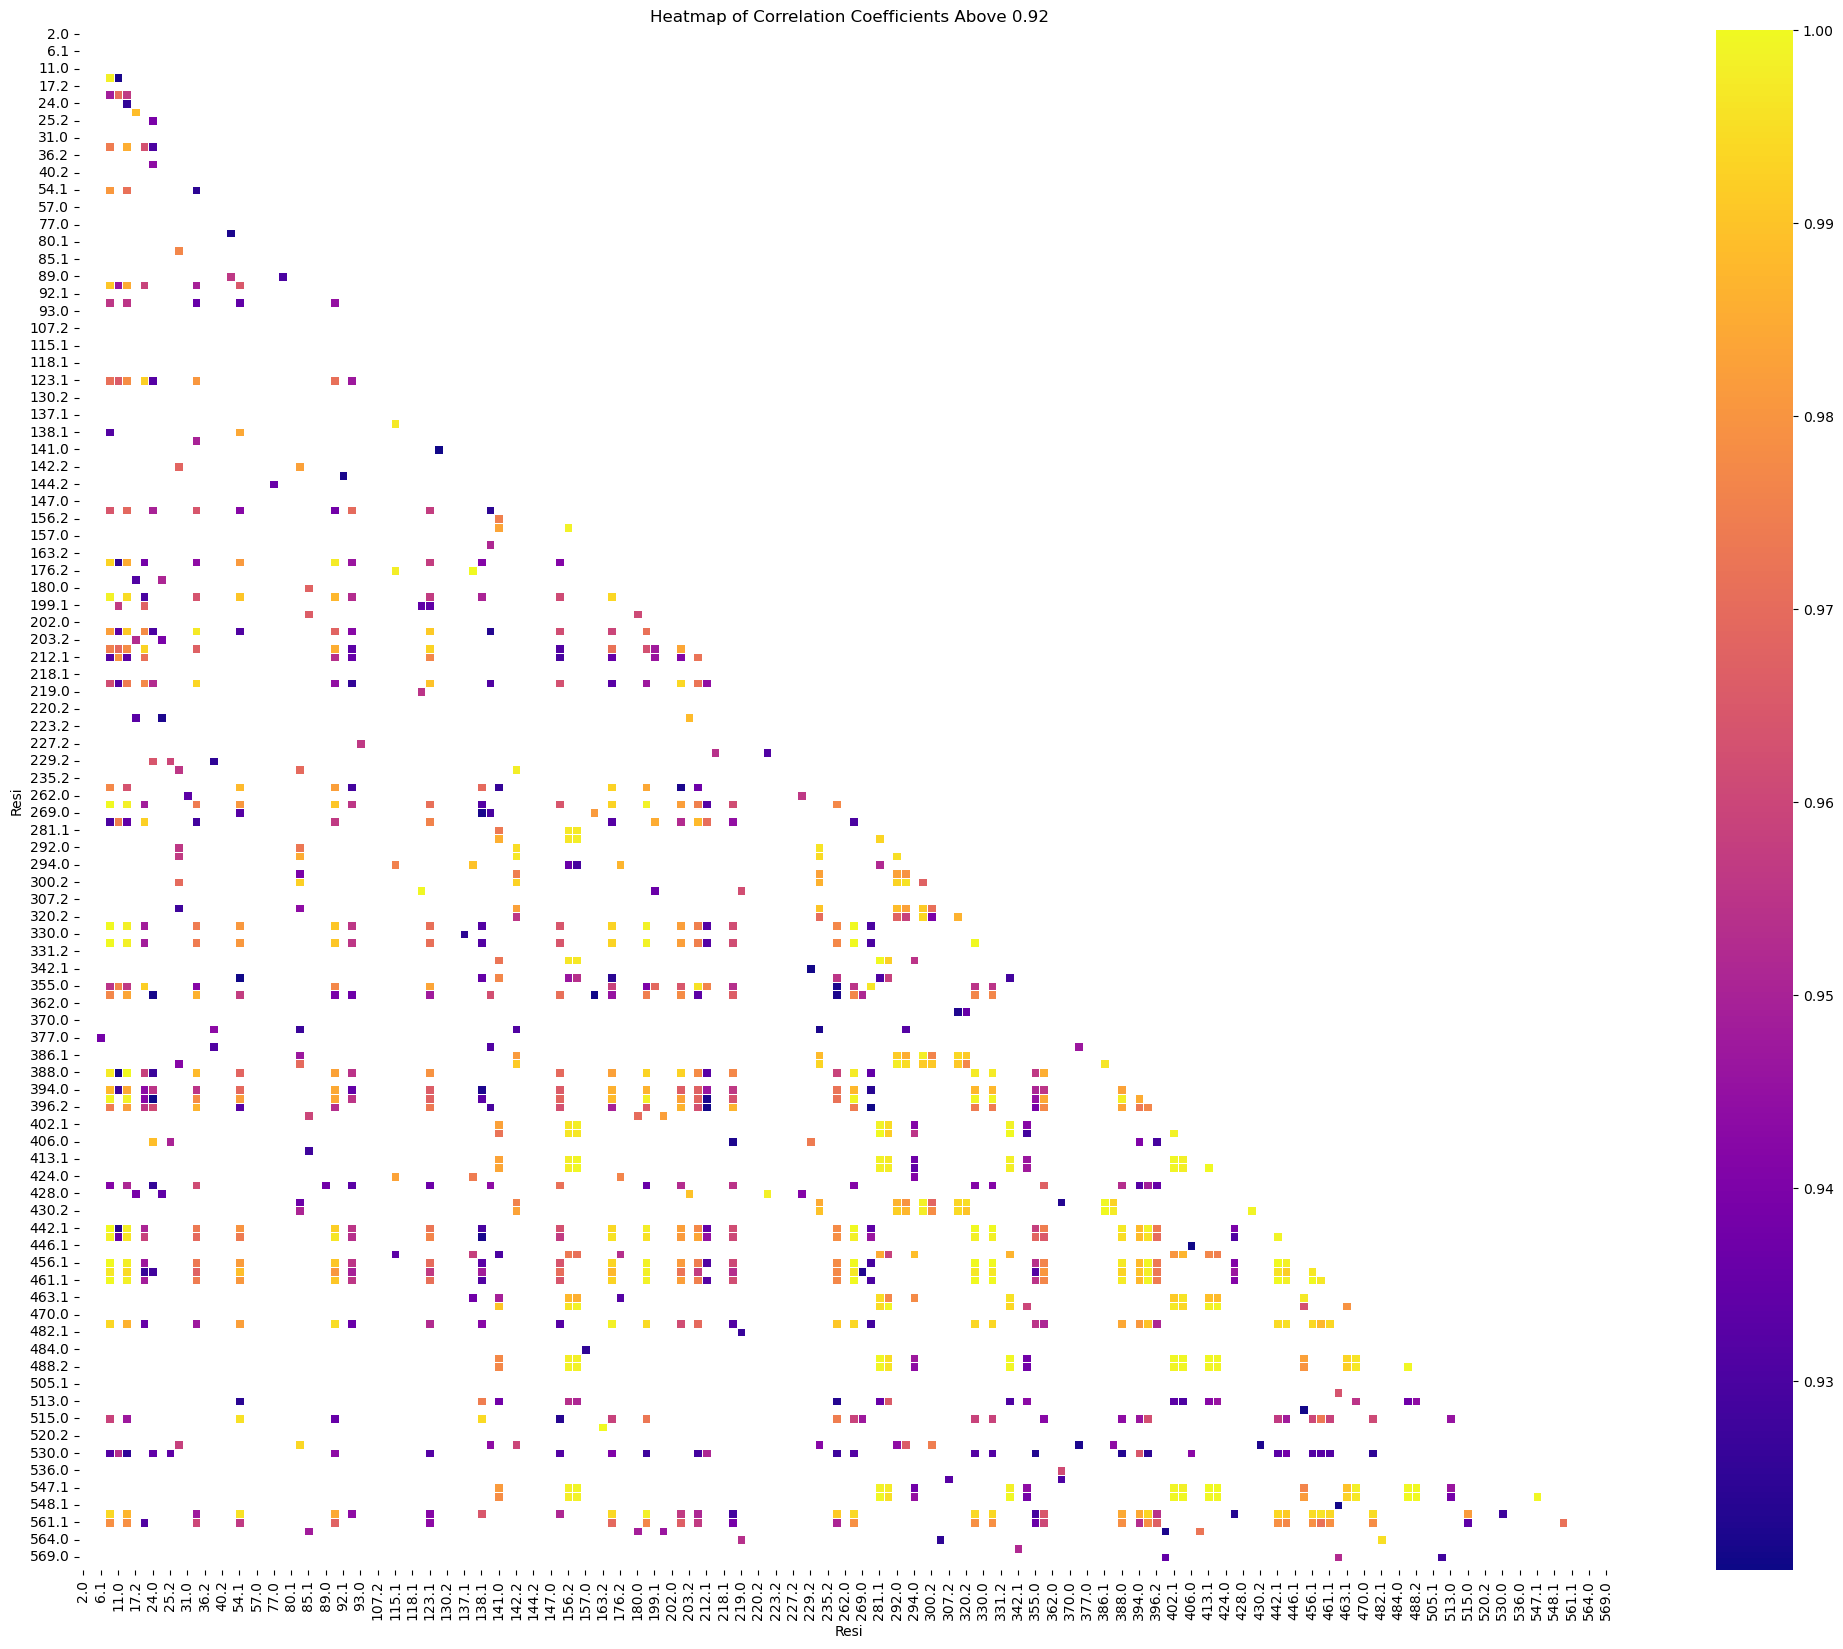

In [9]:
# alternatively, view the result of various cutoffs simultaneously
plots.heatmap_correlation_cutoffs(df, min_corr=.92)

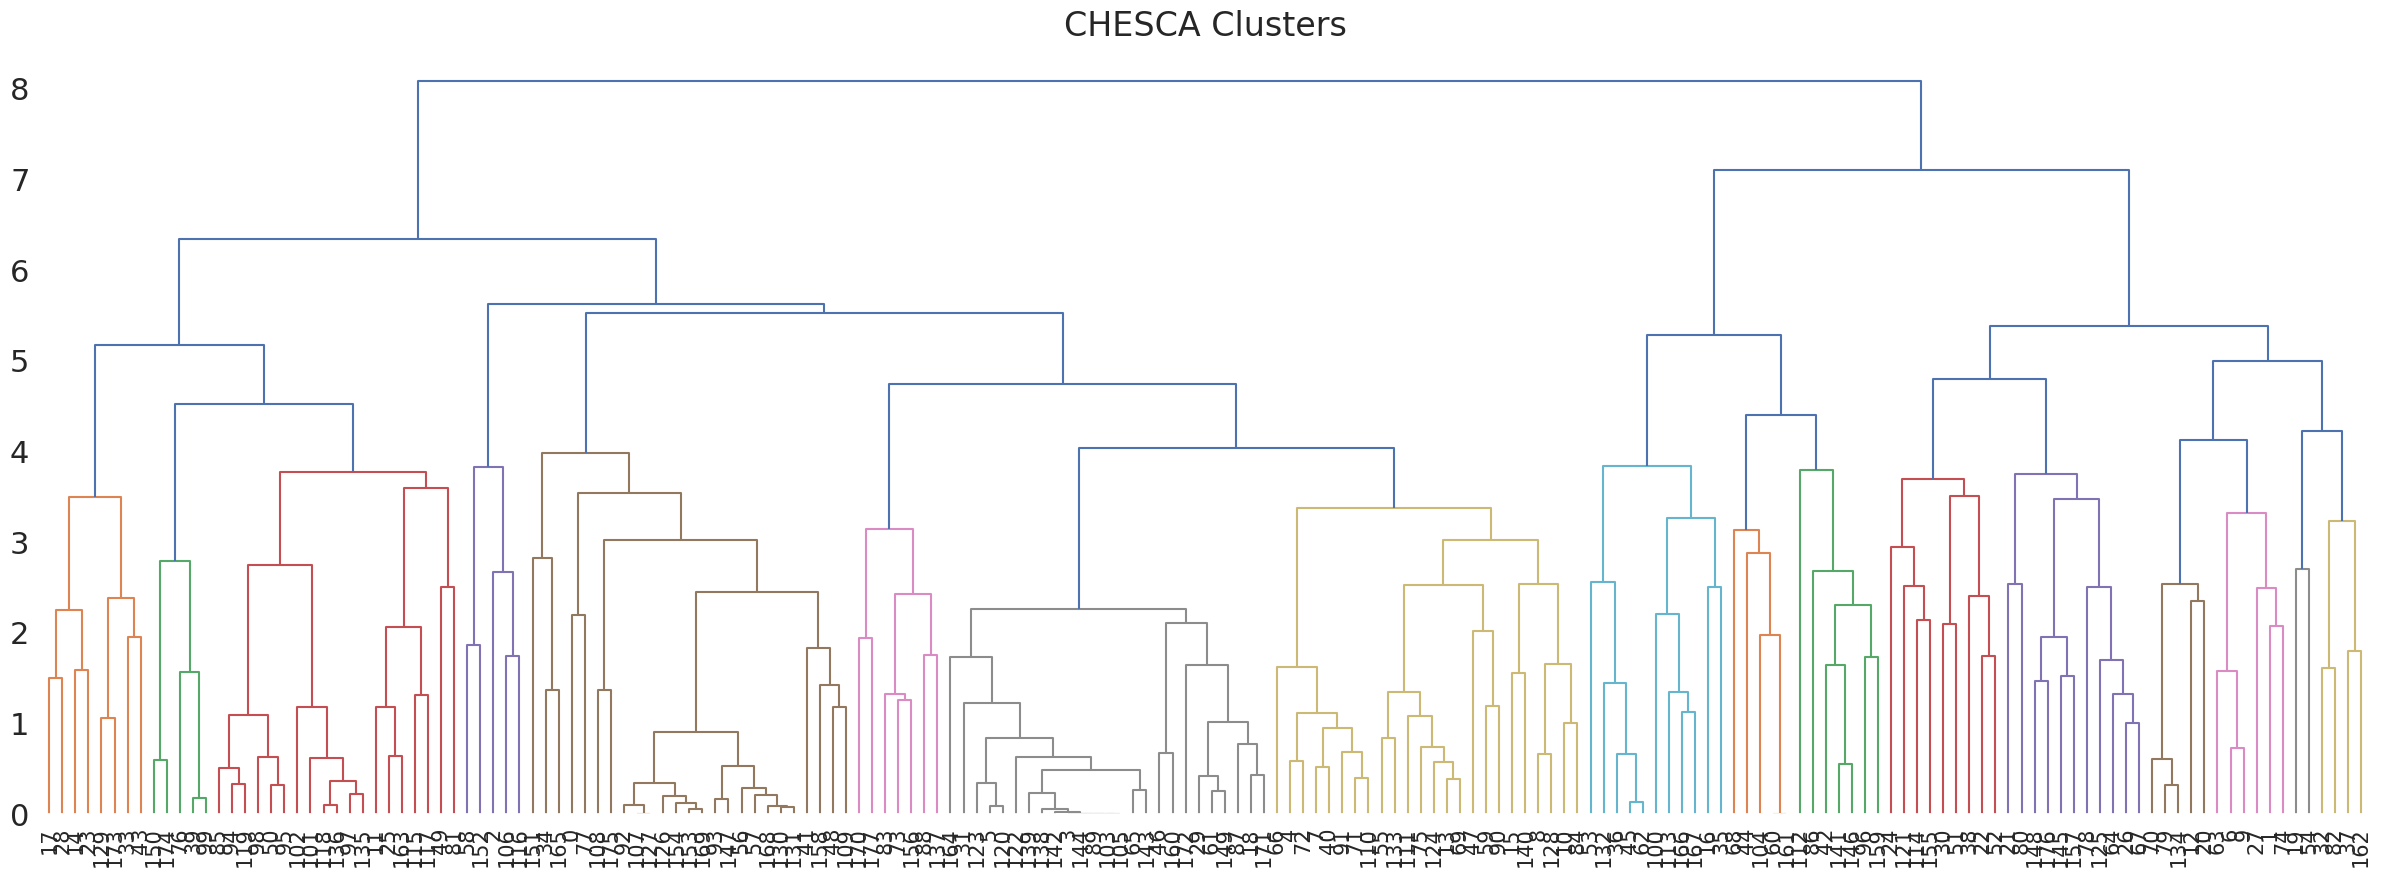

In [23]:
# look at the clustering with a given cutoff
lots.show_dendrogram(hag,cutoff=96)

In [36]:
# SVD on the ccs data
dims = svd.SVD(df)

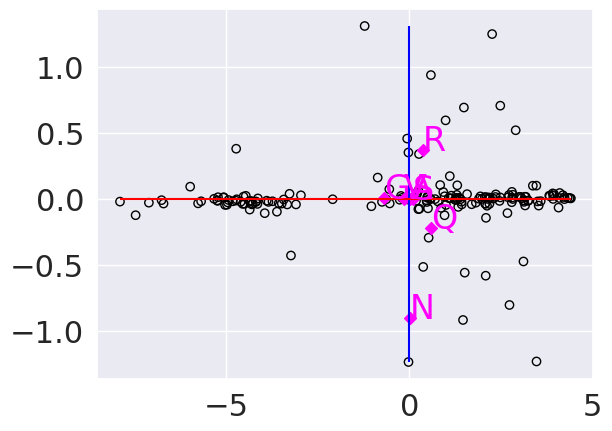

In [46]:
plots.plot_svd(dims)

In [86]:
df.T.corr().abs().fillna(0)

Resi,2.0,5.0,6.1,6.2,11.0,17.1,17.2,19.1,24.0,25.1,...,547.1,547.2,548.1,548.2,561.1,561.2,564.0,565.0,569.0,574.0
Resi,,,,,,,,,,,,,,,,,,,,,
2.0,1.000000,0.137274,0.368572,0.597637,0.736154,0.570612,0.077311,0.563160,0.530732,0.100531,...,0.741131,0.745840,0.179468,0.621193,0.459797,0.847799,0.480482,0.780938,0.563317,0.024305
5.0,0.137274,1.000000,0.640432,0.353062,0.305640,0.345321,0.773849,0.375414,0.308501,0.702498,...,0.345383,0.340090,0.471566,0.361277,0.451926,0.136114,0.368825,0.417259,0.494701,0.190477
6.1,0.368572,0.640432,1.000000,0.674499,0.620304,0.676767,0.256114,0.665614,0.840462,0.254942,...,0.459392,0.441274,0.403747,0.675250,0.666372,0.343246,0.401282,0.713987,0.023588,0.461854
6.2,0.597637,0.353062,0.674499,1.000000,0.919941,0.998364,0.294448,0.948393,0.917702,0.341702,...,0.731378,0.715315,0.576937,0.994038,0.979031,0.529261,0.580026,0.738922,0.001238,0.680953
11.0,0.736154,0.305640,0.620304,0.919941,1.000000,0.921647,0.091645,0.970500,0.878725,0.109065,...,0.630102,0.618805,0.356236,0.891078,0.860937,0.704197,0.802945,0.796962,0.147079,0.485499
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
561.2,0.847799,0.136114,0.343246,0.529261,0.704197,0.528644,0.318976,0.543312,0.587993,0.288282,...,0.377998,0.375542,0.375909,0.516512,0.353488,1.000000,0.406971,0.536342,0.800493,0.128665
564.0,0.480482,0.368825,0.401282,0.580026,0.802945,0.588827,0.005861,0.790631,0.559764,0.039342,...,0.300120,0.295742,0.325469,0.517872,0.572622,0.406971,1.000000,0.637796,0.143979,0.346507
565.0,0.780938,0.417259,0.713987,0.738922,0.796962,0.713946,0.009752,0.733411,0.755109,0.031597,...,0.823401,0.819044,0.311282,0.758177,0.679576,0.536342,0.637796,1.000000,0.107725,0.459570


In [113]:
# import seaborn as sns
# import matplotlib.pyplot as plt
# cmap = sns.color_palette('icefire', as_cmap=True)
# norm = plt.Normalize(vmin=min_corr, vmax=1)  # 0 and 1 are the defaults, but you can adapt these to fit other uses
# palette = sns.color_palette([cmap(norm(h)) for h in np.linspace(min_corr,1,100)])

In [29]:
# look at raw cs
cs = pd.read_csv('test_cs.csv')
states = ['R','Q','N','A','G','S','V']
w1 = [f'{state}w1' for state in states]
w2 = [f'{state}w2' for state in states]
w1a = cs[w1].values
w2a = cs[w2].values


In [127]:
ref = cs[['Qw1','Qw2']].values
B = cs[['Sw1','Sw2']].values
A = cs[['Rw1','Rw2']].values

het_coef = .25
# distance between apo/ref and activated peaks
Hrb= (ref[:,1]-B[:,1])**2
Hetrb = (het_coef*(ref[:,0]-B[:,0]))**2
dist_b = np.sqrt(Hrb+Hetrb)

Hra= (ref[:,1]-A[:,1])**2
Hetra = (het_coef*(ref[:,0]-A[:,0]))**2
dist_a = np.sqrt(Hra+Hetra)

vb = (B-ref)/np.linalg.norm((B-ref))
va = (A-ref)/np.linalg.norm((A-ref))
dot = (va*vb).sum(axis=1)
denominator = (dist_a*dist_b)
cos_theta = dot/denominator
cos_theta = np.nan_to_num(cos_theta,nan=0)

/tmp/ipykernel_91162/257439219.py:19: RuntimeWarning: invalid value encountered in divide
  cos_theta = dot/denominator


In [129]:
dot/((vb*vb).sum(axis=1))

array([-3.21055853e-02,  1.71292539e+00,  5.13059602e-01,  0.00000000e+00,
        3.87419318e-01,  8.99285831e-02, -5.38073453e-02,  1.63922354e-01,
        1.26584404e+00,  5.65704591e-01,  8.02637326e-02,  3.39486564e-01,
        1.21854449e+00,  1.98866460e-01,  1.75731756e-01,  4.12043909e-01,
       -6.14896295e-02,  2.11272380e-01,  1.12348391e-02, -2.01309814e-01,
        1.59371424e-01,  7.22264638e-01, -9.83834071e-02, -9.77843576e-02,
        3.67275895e-01,  7.07224418e-01, -5.45554186e-02,  1.01440084e+00,
        3.14563803e-01, -7.19428665e-01,  3.92606244e-01,  7.62612761e-02,
        7.68590018e-01,  2.15047515e-01, -2.23822251e-01,  1.48922829e+00,
        5.22725896e-01,  1.32026866e+00,  6.24189438e-02,  4.56384966e-01,
       -6.25033070e-02, -5.67627065e-01, -4.84463747e-02, -1.92007505e-01,
        5.61615848e+00,  1.87088777e+00, -3.82517157e-01,  4.71913957e-01,
       -4.31657199e+00,  1.19069514e-01,  8.44045857e-01,  1.22046395e-01,
        6.11279258e-01,  

In [121]:
np.dot(va[3],vb[3])/denominator[3]

/tmp/ipykernel_91162/3148199103.py:1: RuntimeWarning: invalid value encountered in scalar divide
  np.dot(va[3],vb[3])/denominator[3]


nan

In [126]:
np.nan_to_num?

Signature: np.nan_to_num(x, copy=True, nan=0.0, posinf=None, neginf=None)
Docstring:
Replace NaN with zero and infinity with large finite numbers (default
behaviour) or with the numbers defined by the user using the `nan`,
`posinf` and/or `neginf` keywords.

If `x` is inexact, NaN is replaced by zero or by the user defined value in
`nan` keyword, infinity is replaced by the largest finite floating point
values representable by ``x.dtype`` or by the user defined value in
`posinf` keyword and -infinity is replaced by the most negative finite
floating point values representable by ``x.dtype`` or by the user defined
value in `neginf` keyword.

For complex dtypes, the above is applied to each of the real and
imaginary components of `x` separately.

If `x` is not inexact, then no replacements are made.

Parameters
----------
x : scalar or array_like
    Input data.
copy : bool, optional
    Whether to create a copy of `x` (True) or to replace values
    in-place (False). The in-place operati